In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4.5)

**Implementation of extracting Countries from the main dataset**

In [3]:
class CountryDataExtractor:

    def __init__(self, dataset):
        self.dataset = dataset

    def extractCountry(self, countryCode):
        return self.dataset[self.dataset["iso_code"] == countryCode]

# **Reading Datasets (CovidData & Sentiments):**

In [4]:
#owid-covid-data
owid_covid_data = pd.read_csv('/content/drive/MyDrive/PMDSPorject/owid-covid-data.csv')
owid_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187092,ZWE,Africa,Zimbabwe,2022-05-12,248943.0,301.0,127.571,5481.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187093,ZWE,Africa,Zimbabwe,2022-05-13,249131.0,188.0,131.000,5482.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187094,ZWE,Africa,Zimbabwe,2022-05-14,249206.0,75.0,141.714,5482.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187095,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
#choosing the country
cde = CountryDataExtractor(owid_covid_data)
covidData = cde.extractCountry("AUS")
covidData = covidData[covidData["date"].between('2020-03-30' , '2021-12-30')] #we can't compute seasonality starting sooner than 2020-03-30
covidData

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
9836,AUS,Oceania,Australia,2020-03-30,4361.0,377.0,382.714,17.0,1.0,1.429,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
9837,AUS,Oceania,Australia,2020-03-31,4559.0,198.0,359.286,18.0,1.0,1.429,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
9838,AUS,Oceania,Australia,2020-04-01,4862.0,303.0,356.857,20.0,2.0,1.714,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
9839,AUS,Oceania,Australia,2020-04-02,5116.0,254.0,329.429,24.0,4.0,1.571,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
9840,AUS,Oceania,Australia,2020-04-03,5330.0,214.0,312.429,28.0,4.0,2.143,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10472,AUS,Oceania,Australia,2021-12-26,310478.0,9884.0,7970.857,2196.0,6.0,7.143,...,13.0,16.5,NaN,3.84,83.44,0.944,404.1,0.12,9.72,15.669947
10473,AUS,Oceania,Australia,2021-12-27,322275.0,11797.0,9014.429,2202.0,6.0,6.857,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
10474,AUS,Oceania,Australia,2021-12-28,339953.0,17678.0,10749.714,2210.0,8.0,6.857,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
10475,AUS,Oceania,Australia,2021-12-29,361322.0,21369.0,12608.571,2224.0,14.0,7.286,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN


In [6]:
sentimentsAU = pd.read_csv('/content/drive/MyDrive/PMDSPorject/sentimentsAU.csv')
sentimentsAU = sentimentsAU[sentimentsAU["day"].between('2020-03-30' , '2021-12-30')]
sentimentsAU

,day,timestamp,date,lang,text,day.1,text_modified,sentiment,negPercentage,netPercentage,posPercentage
31,2020-03-30,20,20,20,20,20,20,20,0.250000,0.300000,0.450000
32,2020-03-31,33,33,33,33,33,33,33,0.181818,0.515152,0.303030
33,2020-04-01,37,37,37,37,37,37,37,0.270270,0.432432,0.297297
34,2020-04-02,27,27,27,27,27,27,27,0.148148,0.555556,0.296296
35,2020-04-03,21,21,21,21,21,21,21,0.095238,0.619048,0.285714
...,...,...,...,...,...,...,...,...,...,...,...
663,2021-12-26,16,16,16,16,16,16,16,0.250000,0.625000,0.125000
664,2021-12-27,10,10,10,10,10,10,10,0.200000,0.400000,0.400000
665,2021-12-28,15,15,15,15,15,15,15,0.333333,0.333333,0.333333
666,2021-12-29,13,13,13,13,13,13,13,0.230769,0.538462,0.230769


# **Sentiments Seasonality:**

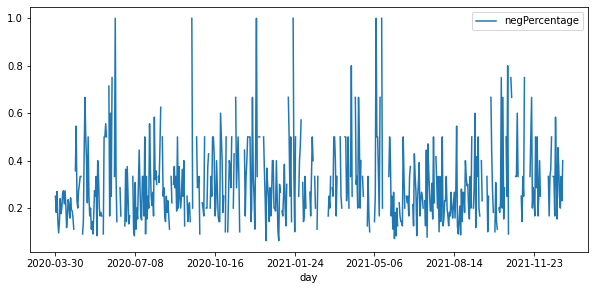

In [7]:
sentimentsAU.plot('day', 'negPercentage')

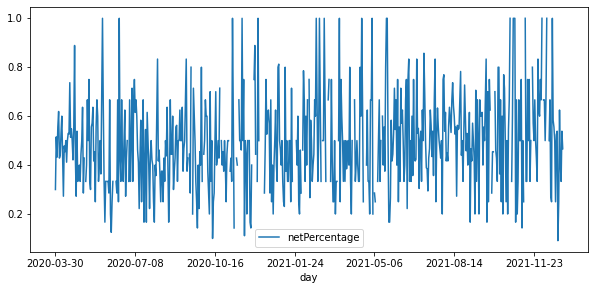

In [8]:
sentimentsAU.plot('day', 'netPercentage')

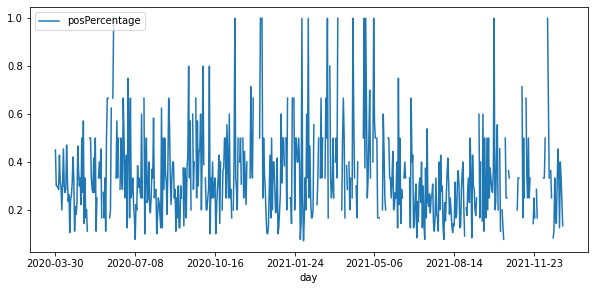

In [9]:
sentimentsAU.plot('day', 'posPercentage')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


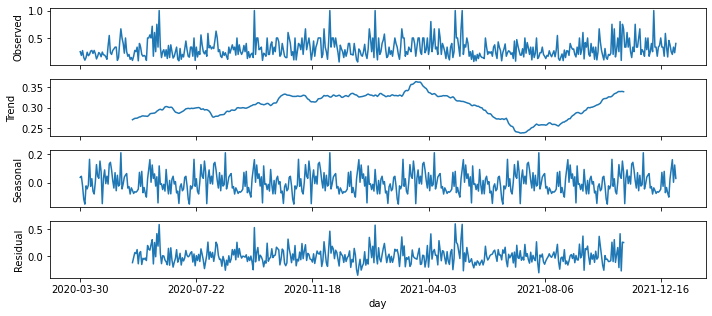

In [10]:
#Seasonality on negPercentage
sentimentsAU_negPercentage = sentimentsAU[['day','negPercentage']].dropna() #8 of them were NaN, so I dropped them


from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsAU_negPercentage.set_index('day', inplace=True)
analysis = sentimentsAU_negPercentage[['negPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

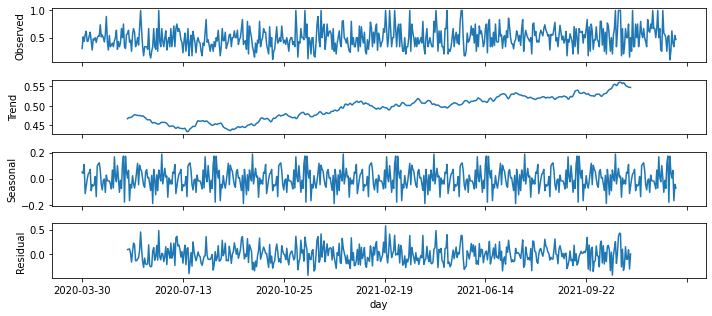

In [11]:
#Seasonality on netPercentage
sentimentsAU_netPercentage = sentimentsAU[['day','netPercentage']].dropna() #8 of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsAU_netPercentage.set_index('day', inplace=True)
analysis = sentimentsAU_netPercentage[['netPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

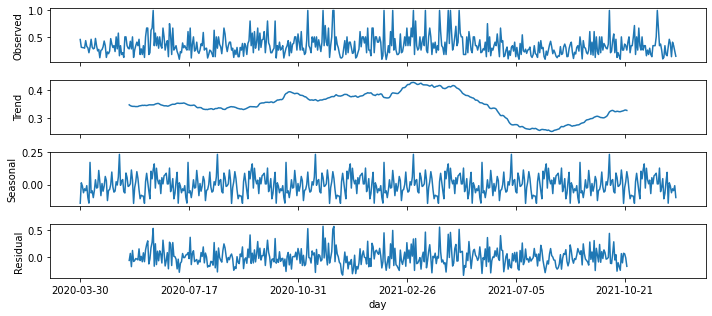

In [12]:
#Seasonality on posPercentage
sentimentsAU_posPercentage = sentimentsAU[['day','posPercentage']].dropna() #some of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsAU_posPercentage.set_index('day', inplace=True)
analysis = sentimentsAU_posPercentage[['posPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

In [13]:
#covidData.plot("date","new_cases_smoothed")

In [14]:
#covidData.plot("date","new_deaths_smoothed")

In [15]:

#covidData.plot("date","hosp_patients")

In [16]:

#covidData.plot("date", "positive_rate")

# **Feature "new_deaths" is chosen to compare its trend with sentiment trends**

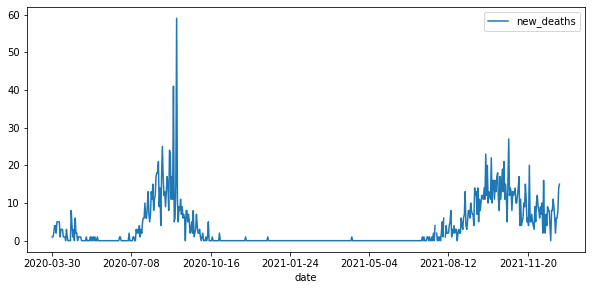

In [19]:
covidData.plot("date","new_deaths")

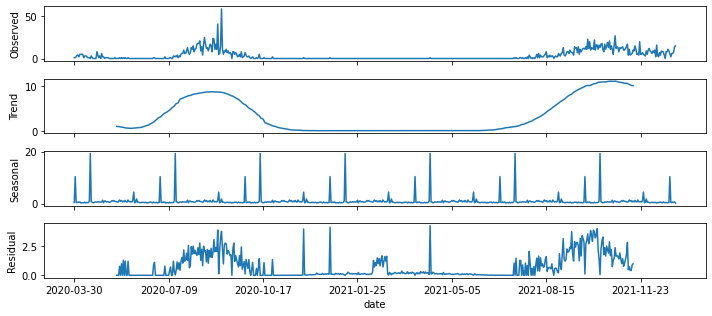

In [17]:
"""new_death Seasonality"""

covidDataAU_death = covidData[['date','new_deaths']].dropna() 
covidDataAU_death =covidDataAU_death.replace(0,0.001) # because seasonality can not be performed for zero values


from statsmodels.tsa.seasonal import seasonal_decompose
covidDataAU_death.set_index('date', inplace=True)
analysis = covidDataAU_death[['new_deaths']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_cases" is chosen to compare its trend with sentiment trends**

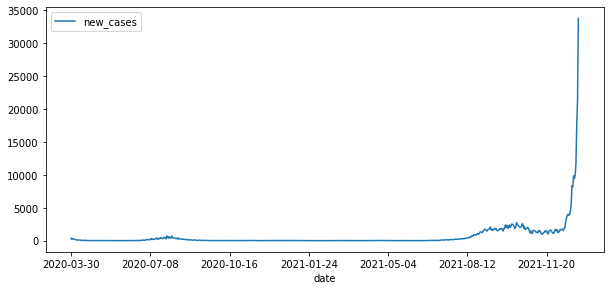

In [21]:
covidData.plot("date","new_cases")

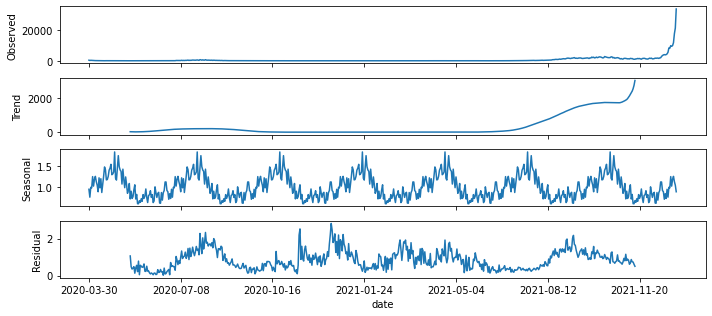

In [27]:
"""new_cases Seasonality"""
covidDataAU_case = covidData[['date','new_cases']].dropna()
covidDataAU_case =covidDataAU_case.replace(0,1) # because seasonality can not be performed for zero values

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataAU_case.set_index('date', inplace=True)
analysis = covidDataAU_case[['new_cases']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "hosp_patients" is chosen to compare its trend with sentiment trends**

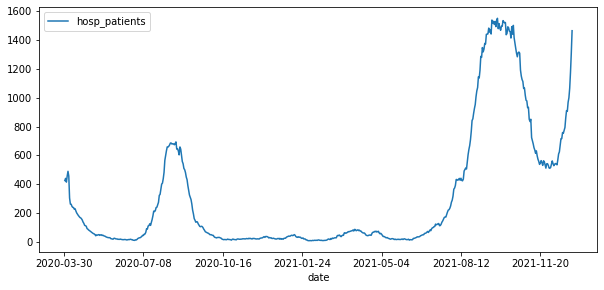

In [18]:
covidData.plot("date","hosp_patients")

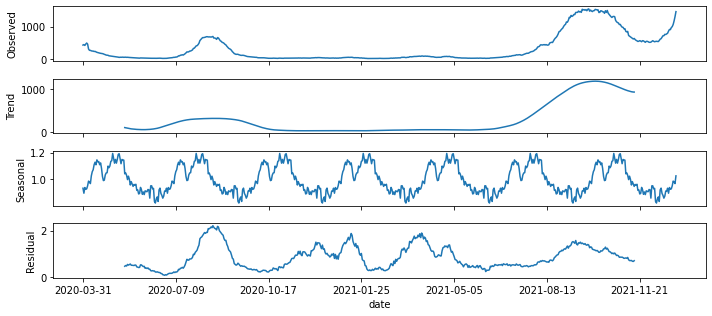

In [19]:
"""hosp_patients Seasonality"""
covidDataAU_hosp = covidData[['date','hosp_patients']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataAU_hosp.set_index('date', inplace=True)
analysis = covidDataAU_hosp[['hosp_patients']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_vaccinations" is chosen to compare its trend with sentiment trends**

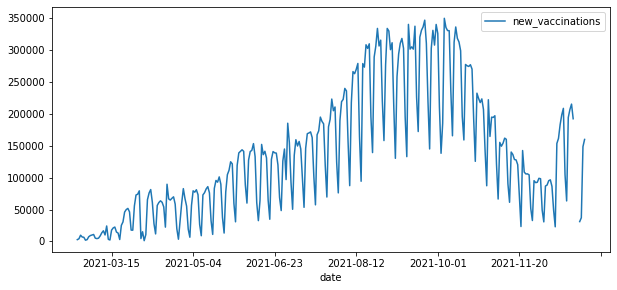

In [20]:
covidData.plot("date","new_vaccinations")

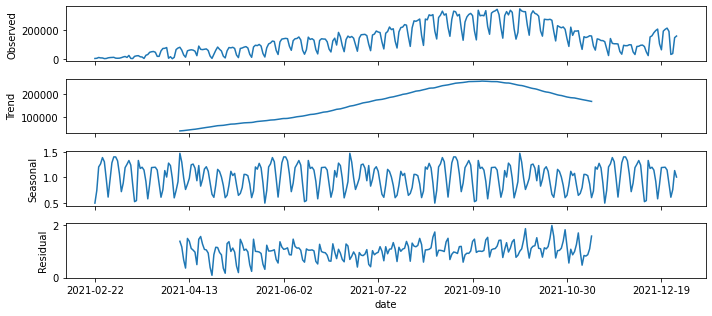

In [21]:
"""new_vaccinations Seasonality"""
covidDataAU_vacc = covidData[['date','new_vaccinations']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataAU_vacc.set_index('date', inplace=True)
analysis = covidDataAU_vacc[['new_vaccinations']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "icu_patients" is chosen to compare its trend with sentiment trends**

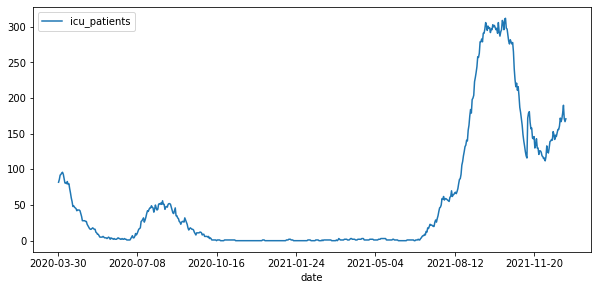

In [22]:
covidData.plot("date","icu_patients")

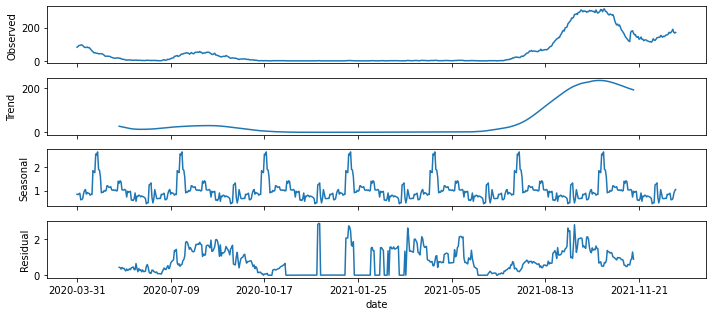

In [23]:
"""icu_patients Seasonality"""
covidDataAU_icu = covidData[['date','icu_patients']].dropna()
covidDataAU_icu = covidDataAU_icu.replace(0,0.001) # because seasonality can not be performed for zero values

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataAU_icu.set_index('date', inplace=True)
analysis = covidDataAU_icu[['icu_patients']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();